## Encoder and Decoder using Autoencoder

Data Set: MNIST

    Note: Discard the labels

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.
C:\Users\sneha chikhalekar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sneha chikhalekar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sneha chikhalekar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sneha chikhalekar\Anaconda3\lib\sit

11493376/11490434 [==============================] - 798s 69us/step


Normalize all values between 0 and 1

In [2]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [3]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
x_train.ndim

3

In [64]:
x_train[[0]]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

Flatten the 28x28 images into vectors of size 784.


In [5]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


#### Fully-connected neural layer as encoder and as decoder:

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

In [8]:
# The size of encoded and actual representations
encoding_dim = 32 
actual_dim = x_train.shape[1] #784

In [58]:
# Input placeholder
input_img = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

In [59]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [60]:
print(autoencoder.summary())

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


Create a separate encoder model:

In [61]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [62]:
print(encoder.summary())

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


Create a separate decoder model

In [63]:
# create a placeholder for an encoded (16-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [64]:
print(decoder.summary())

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


Configure the model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [65]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train our autoencoder for 50 epochs:

In [66]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3582 - val_loss: 0.2703
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2623 - val_loss: 0.2514
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2418 - val_loss: 0.2297
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2219 - val_loss: 0.2121
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2072 - val_loss: 0.1998
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1967 - val_loss: 0.1907
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1886 - val_loss: 0.1835
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1820 - val_loss: 0.1774
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1762 - val_loss: 0.1

Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [67]:
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

In [19]:
imgs_1 = autoencoder.predict(x_test)

In [20]:
decoded_imgs[0][0:4]

array([0.00095025, 0.00083619, 0.00049248, 0.00030532], dtype=float32)

In [21]:
imgs_1[0][0:4]

array([0.00095025, 0.00083619, 0.00049248, 0.00030532], dtype=float32)

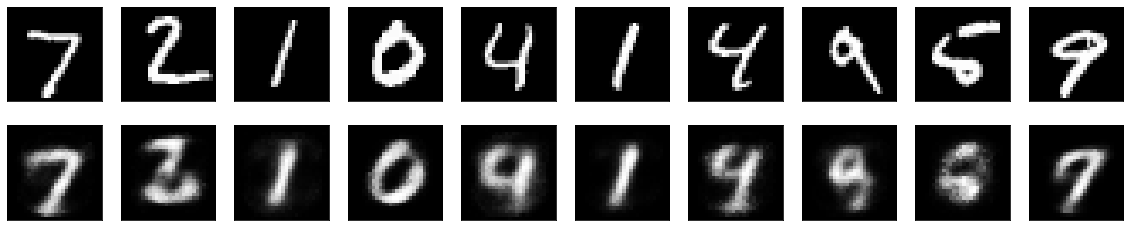

In [68]:
# use Matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Above autoencoder makes the encoder and decoder separate annd then used the encoder to encoded the test images and use the decoder to decode the images whuich were encoded by the same encoder on which the decoder was made

## Add the sparsity constraint on the encoded representations

In the above example,the representation were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA.
But the another way to constrain the representation to be compact is to add a sparsity constarint on the activity of the hidden representations so fewer units would "fire" at a given time.
In Keras, this can be done by adding an activity_regularizer to our Dense layer

In [24]:
## L1 Regularizer ie Feature Selection

In [146]:
from keras import regularizers

encoding_dim=32

input_img=Input(shape=(784,))

# add dense layer with L1 activity regularizer

encoded_new=Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded_new=Dense(784,activation='sigmoid')(encoded_new)

autoencoder_new=Model(input_img,decoded_new)

In [147]:
print(autoencoder_new.summary())

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
autoencoder_new.compile(optimizer='adadelta', loss='binary_crossentropy')

In [150]:
autoencoder_new.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.6732 - val_loss: 0.6484
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.4531 - val_loss: 0.44

In [148]:
encoder_new=Model(input_img,encoded_new)

In [151]:
# Note that we take them from the *test* set
#encoded_imgs = encoder_new.predict(x_test)

decoded_imgs = autoencoder_new.predict(x_test)

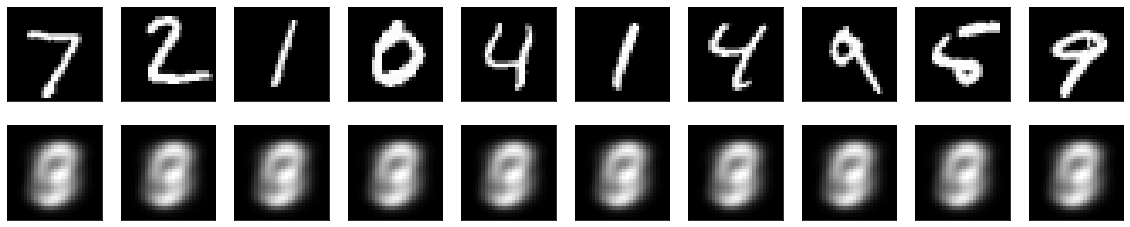

In [152]:
# use Matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dense autoencoder

In [81]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [138]:
autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder.fit(x_train, x_train,
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [139]:
print(autoencoder.summary())

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 784)               101

In [140]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [141]:
print(encoder.summary())

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.3500 - val_loss: 0.2644
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.2576 - val_loss: 0.2512
Epoch 3/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.2435 - val_loss: 0.2361
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.2285 - val_loss: 0.2205
Epoch 5/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.2120 - val_loss: 0.2069
Epoch 6/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1999 - val_loss: 0.1935
Epoch 7/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1883 - val_loss: 0.1803
Epoch 8/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1784 - val_loss: 0.1719
Epoch 9/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1709 - val_los

In [153]:
# Note that we take them from the *test* set
encoded_imgs = encoder_new.predict(x_test)

decoded_imgs = autoencoder.predict(x_test)

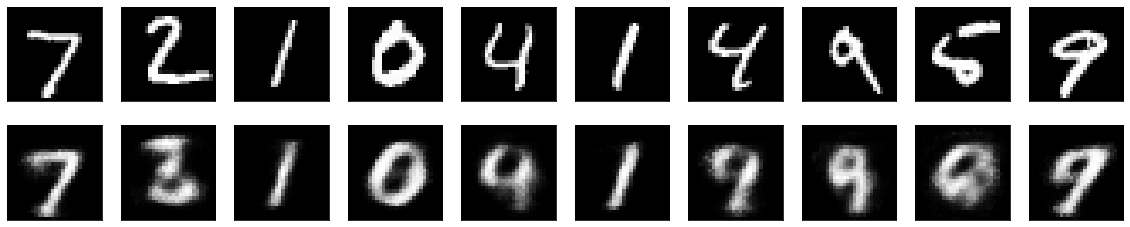

In [154]:
# use Matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()